In [853]:
import numpy as np
import pandas as pd

data visualization

In [854]:
import matplotlib.pyplot as plt
import seaborn as sns

**Influential points** 

In [855]:
from scipy import stats

**Bartlett's sphericity test**

In [856]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

**PCA**

In [857]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**TEST OF ASSUMPTIONS**

In [858]:
import statsmodels.api as sm
#!

#2

#3 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#DW Test
from statsmodels.stats.stattools import durbin_watson

Linear Regression
Testing and training data

In [859]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import glm

weights = weights of stockpicking concept
' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk'
outputs = The normalized investment performance indicator 
'Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'

In [860]:
csvFile = "stock portfolio performance data set.xlsx"

In [861]:
# df = pd.read_excel(csvFile,"all period",skiprows=[0],usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df = pd.read_excel(csvFile,"all period",skiprows=[0],usecols = [1,2,3,4,5,6,13,14,15,16,17,18])

In [862]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [863]:
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return.1', 'Excess Return.1',
       'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1',
       'Rel. Win Rate.1'],
      dtype='object')

In [864]:
weights = df.columns[:6]
print(weights)

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')


In [865]:
outputs = df.columns[-6:]
print(outputs)

Index(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object')


Outputs

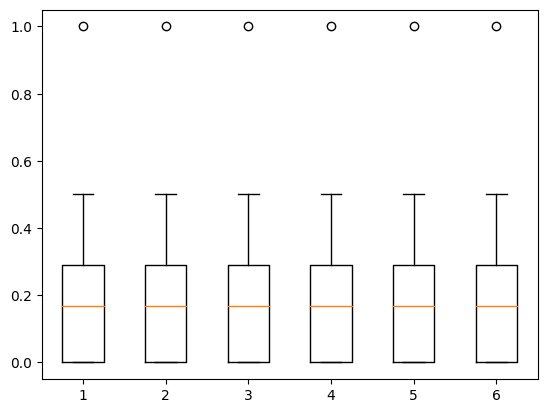

In [866]:
plt.boxplot(df.iloc[:,:6])
plt.show()

weigths

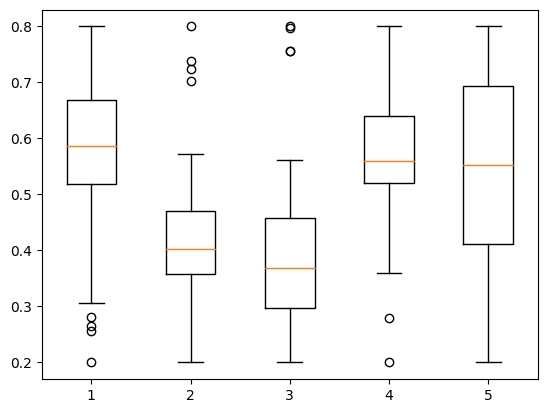

In [867]:
plt.boxplot(df.iloc[:,7:])
plt.show()

Removing influential points



In [868]:
df.shape

(63, 12)

**Menthod1** : Z Score

In [869]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]
df_clean.shape


(57, 12)

In [870]:
df[~(z_scores < threshold).all(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
5,0.0,0.0,0.0,0.0,0.0,1.0,0.200000,0.200000,0.490882,0.429063,0.20,0.235294


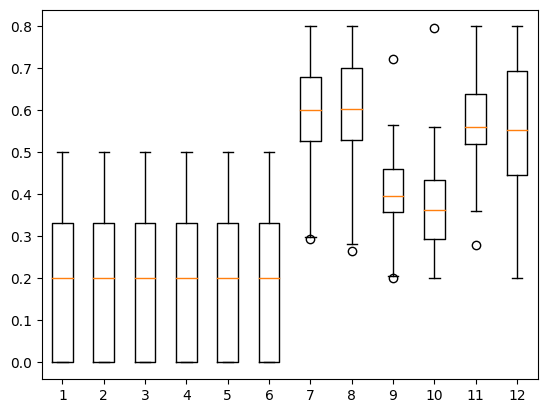

In [871]:
plt.boxplot(df_clean)
plt.show()

**Method 2** : IQR

In [872]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape


(54, 12)

In [873]:
df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.000,0.000,0.000,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.000,0.000,0.000,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.000,0.000,0.000,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.000,0.000,0.000,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.000,1.000,0.000,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
5,0.0,0.0,0.0,0.000,0.000,1.000,0.200000,0.200000,0.490882,0.429063,0.20,0.235294
7,0.5,0.0,0.5,0.000,0.000,0.000,0.652186,0.594190,0.723655,0.797195,0.48,0.376471
15,0.0,0.0,0.0,0.500,0.500,0.000,0.298276,0.265715,0.549684,0.415240,0.52,0.341176
40,0.0,0.0,0.0,0.333,0.333,0.333,0.295124,0.281303,0.524910,0.458258,0.28,0.200000


After removal of outlyers

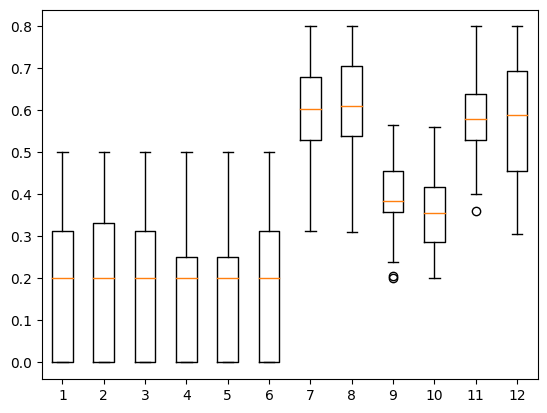

In [874]:
plt.boxplot(df_clean)
plt.show()

In [875]:
# df_clean = df

In [876]:
weight_df = df_clean.iloc[:,:6].copy()
outputs_df = df_clean.iloc[:,-6:].copy()

Corelation matrix

In [877]:
corr_matrix = weight_df.corr()
corr_matrix

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
Large B/P,1.000000,-0.217003,-0.336726,-0.127976,-0.127976,-0.179812
Large ROE,-0.217003,1.000000,-0.217003,-0.178123,-0.178123,-0.230127
Large S/P,-0.336726,-0.217003,1.000000,-0.127976,-0.127976,-0.179812
Large Return Rate in the last quarter,-0.127976,-0.178123,-0.127976,1.000000,-0.338537,-0.216121
Large Market Value,-0.127976,-0.178123,-0.127976,-0.338537,1.000000,-0.216121
Small systematic Risk,-0.179812,-0.230127,-0.179812,-0.216121,-0.216121,1.000000


using seaborn

<Axes: >

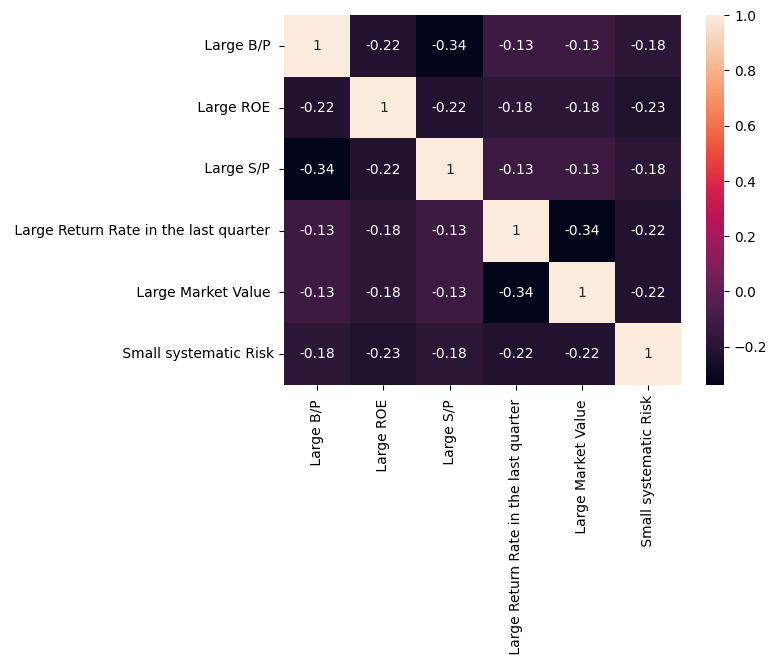

In [878]:
sns.heatmap(corr_matrix, annot=True)

using matlplotlib

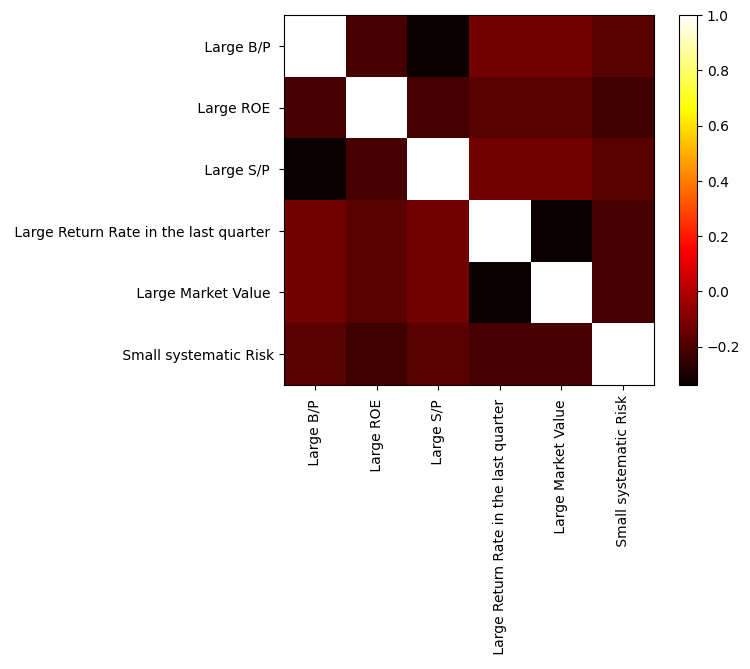

In [879]:
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

Bartlett's sphericity test

In [880]:
# Perform Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(weight_df)

# Print the test results
print('Bartlett Sphericity Test:')
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)


Bartlett Sphericity Test:
Chi-square value: 615.8152602631158
P-value: 1.5461469300934523e-121


p<0.5 : do PCA 

In [881]:
# standardize the data
pca_stand = StandardScaler().fit_transform(weight_df)
pca_stand.shape

(54, 6)

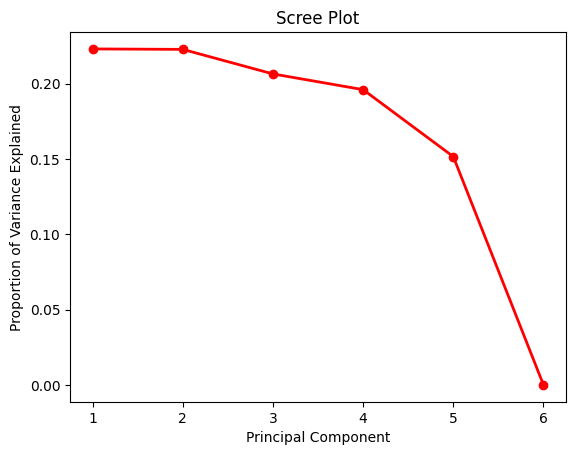

In [882]:
# Fit PCA model and transform the data
pca = PCA()
pca.fit(pca_stand)
# Generate scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [883]:
# perform PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(weight_df)

# create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components)

# print the explained variance ratio of each principal component
print((pca.explained_variance_ratio_ * 100).sum())


99.9999672150788


In [884]:
(pca.explained_variance_ratio_ * 100).sum()


99.9999672150788

Test of assumptions

1.Homoscedasticity

2.Normality

**QQ plot**

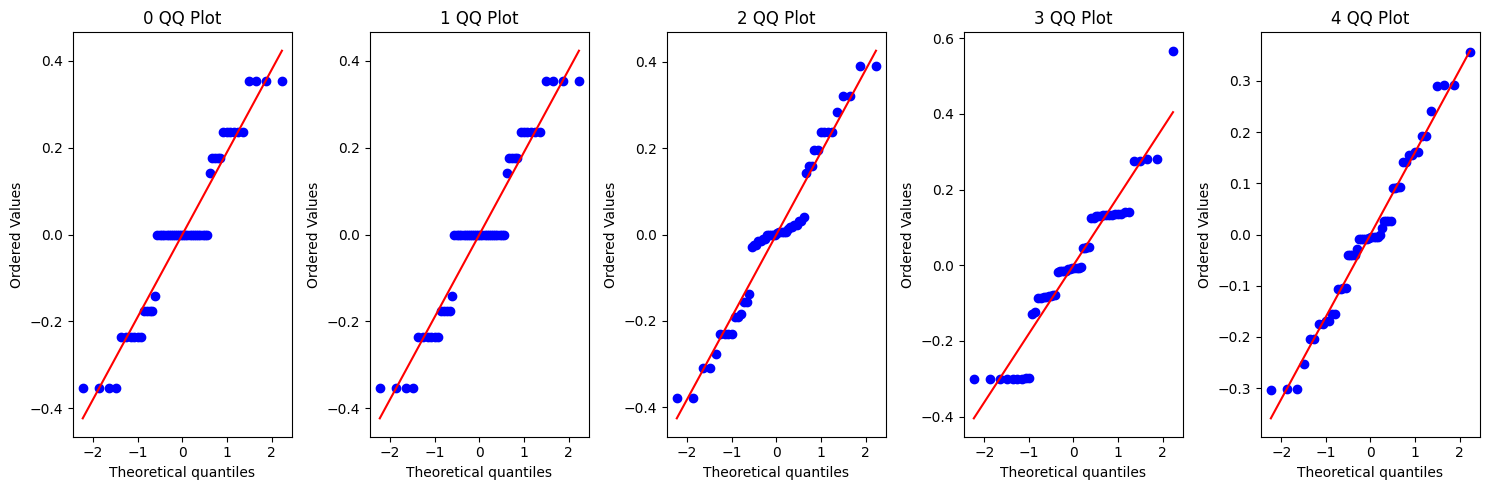

In [885]:
import scipy.stats as stats

# create a figure with 5 subplots
fig, axs = plt.subplots(ncols=5, figsize=(15, 5))

# plot each QQ plot using Matplotlib
for i, col in enumerate(pca_df.columns):
    stats.probplot(pca_df[col], dist="norm", plot=axs[i])
    axs[i].set_title(f'{col} QQ Plot')

plt.tight_layout()
plt.show()


3.Multi Colinearity

**VIF**

In [886]:
for i in range(5):
    print(f'VIF of column {i}: {variance_inflation_factor(pca_df,i):.2f}')

VIF of column 0: 1.00
VIF of column 1: 1.00
VIF of column 2: 1.00
VIF of column 3: 1.00
VIF of column 4: 1.00


4.Auto Corelation

**DW test**

In [895]:
for col in pca_df.columns:
    print(f"DW statistic for {col}: {durbin_watson(pca_df[col])}")


DW statistic for 0: 1.4031280589403141
DW statistic for 1: 2.7949767149755513
DW statistic for 2: 1.5156579990068377
DW statistic for 3: 2.0569198370480075
DW statistic for 4: 1.5096928613601888


**MODEL**

In [896]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, outputs_df, test_size=0.2, random_state=20)

In [897]:
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model on the testing data
y_predict = model.predict(X_test)
score = model.score(X_test, y_test)
# print the R^2 score
print('R^2 score:', score)


R^2 score: 0.5848563275749311


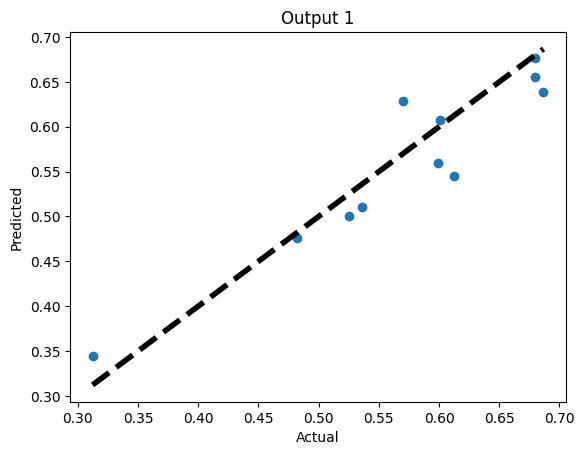

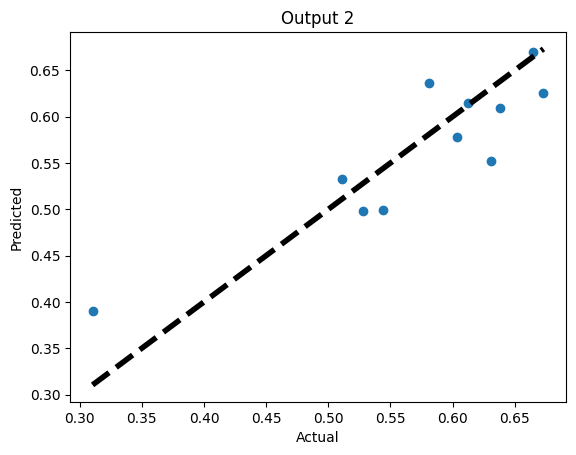

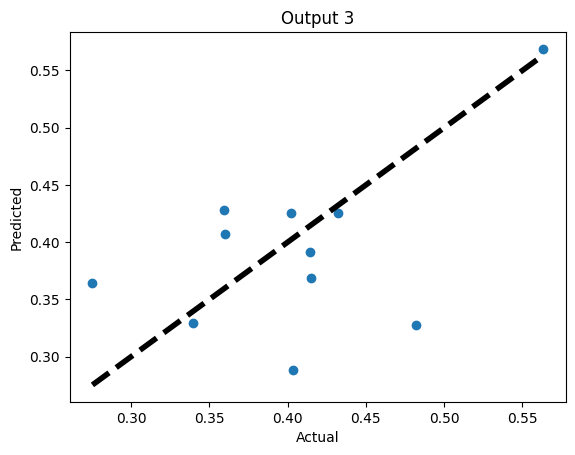

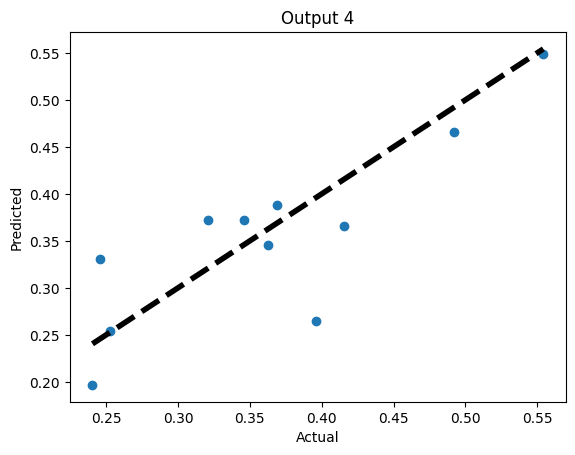

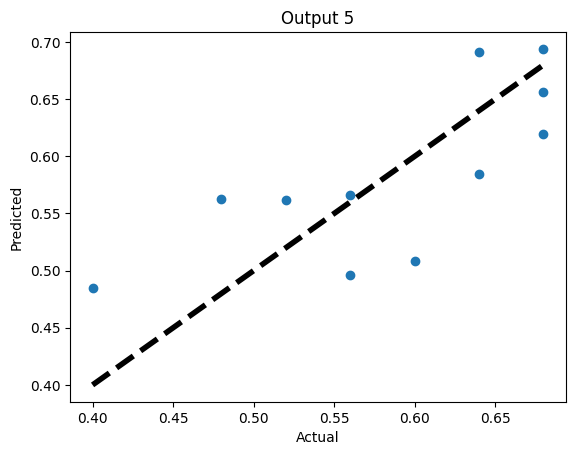

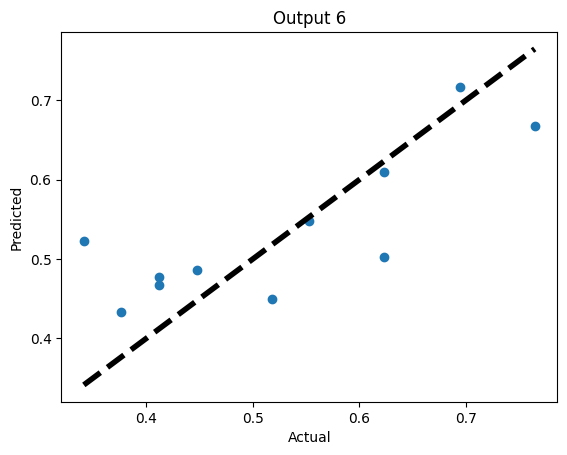

In [892]:
for i in range(6):
    plt.scatter(y_test.iloc[:, i], y_predict[:, i])
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"Output {i+1}")
    plt.show()